# Mader model

In [24]:
# Initial constants
data = Dict(
    "xmin" => 0.0, 
    "xmax" => 500.0e-9, 
    "zmin" => -700.0e-9, 
    "zmax" => 0,
    "nx" => 250, 
    "nz" => 350)

nx, nz = data["nx"], data["nz"]

# Coordinates and velocities
Δx = (data["xmax"] - data["xmin"])/data["nx"]
Δz = (data["zmax"] - data["zmin"])/data["nz"]
x = Vector(data["xmin"]:Δx:data["xmax"])
z = Vector(data["zmin"]:Δz:data["zmax"])

Ux = zeros(Float64, nx, nz)
Uz = zeros(Float64, nx, nz)

# State functions
ax = zeros(Float64, nx, nz)
az = zeros(Float64, nx, nz)

V = zeros(Float64, nx, nz)
P= zeros(Float64, nx, nz)

function setics(data::Dict, x::Vector{Float64}, z::Vector{Float64}, V::Array{Float64, 2}, P::Array{Float64, 2}) 
    xmin, xmax = data["xmin"], data["xmax"]
    zmin, zmax = data["zmin"], data["zmax"]
    nx, nz = data["nx"], data["nz"]
    
    Δx = (xmax - xmin)/nx # m
    Δz = (zmax - zmin)/nz # m
    
    ρ0 = 2413 # kg/m3
    
    p_cold, p_hot = 0.0, 35.6e9 # Pa
    RL, dT = 200.e-9, 50.e-9 # m

    for i=1:nx
        for k=1:nz
            V[i,k] = 1.0/ρ0
            if x[i] + 0.5*Δx <= xmin + RL && z[k] + 0.5*Δz >= zmax - dT
                P[i,k] = p_hot
            else
                P[i,k] = p_cold
            end
        end
    end
end

    
setics(data, x, z, V, P)

# typeof(x), typeof(y), typeof(V), typeof(P)
size(x), size(z), size(P), size(V), size(x[begin:end-1])

((251,), (351,), (250, 350), (250, 350), (250,))

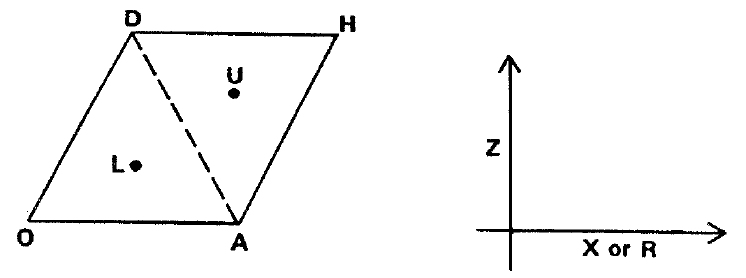
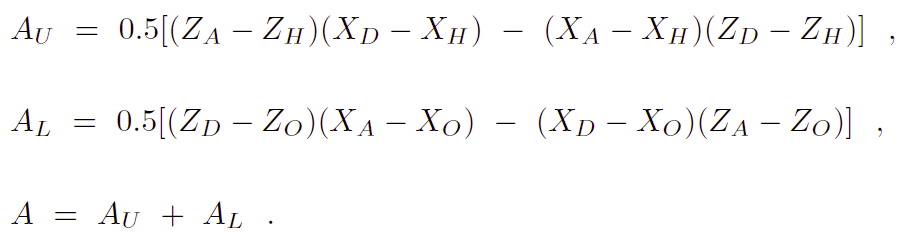
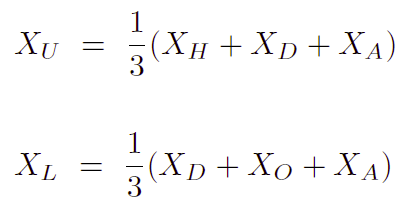

In [38]:
coords = [[x[i], z[j]] for i ∈ 1:nx+1, j ∈ 1:nz+1]

for i ∈ 1:nx+1, j ∈ 1:nz+1 
    AU = 0.5 * ((coords[i+1,j][2] - coords[i+1,j+1][2]) * (coords[i,j+1][1] - coords[i+1,j+1][1]) - 
        (coords[i+1,j][1] - coords[i+1,j+1][1]) * (coords[i,j+1][2] - coords[i+1,j+1][2]))
    AL = 0.5 * ((coords[i,j+1][2] - coords[i,j][2]) * (coords[i+1,j][1] - coords[i,j][1]) - 
        (coords[i,j+1][1] - coords[i,j][1]) * (coords[i+1,j][2] - coords[i,j][2]))
    A = AU + AL
    XU = 1.0/3.0 * (coords[i+1,j+1][1] + coords[i,j+1][1] + coords[i+1,j][1])    
    XL = 1.0/3.0 * (coords[i,j+1][1] + coords[i,j][1] + coords[i+1,j][1])
    # println(i, " ", j, " ", AU, " ", AL, " ", A, "\t", XU, " ", XL)
end

coords[10,25][1]


LoadError: BoundsError: attempt to access 251×351 Matrix{Vector{Float64}} at index [2, 352]

In [28]:
coords[3, 16]

2-element Vector{Float64}:
  3.9999999999999994e-9
 -6.699999999999999e-7

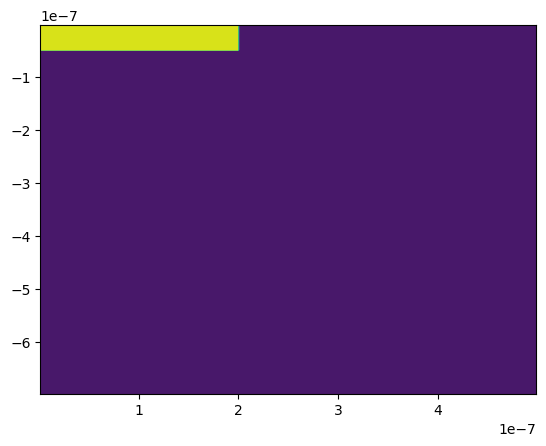

In [52]:
using PyPlot

# using Plots; -- leaving it till I master GR()

x_centers = [0.5*(x[i] + x[i+1]) for i in 1:length(x)-1]
z_centers = [0.5*(z[k] + z[k+1]) for k in 1:length(z)-1]

# we need to trenspose it, because in our mindset coords are (x, y) and
# in matrices Universe -- (row, column), i.e. (y, x)

contourf(x_centers, z_centers, transpose(P))

PyPlot.show();



$$ \sigma_X = P - S_{XX} $$
$$ \sigma_Z = P - S_{ZZ} $$


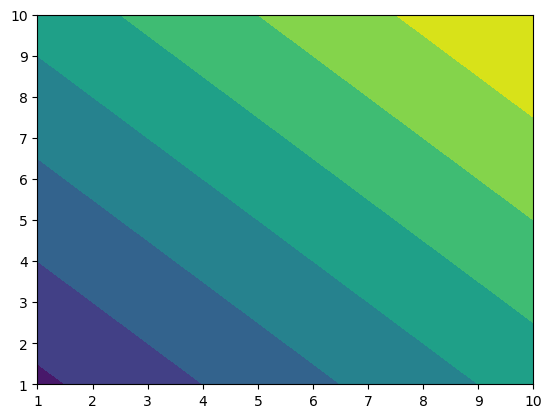

PyObject <matplotlib.contour.QuadContourSet object at 0x000001F6ECCE91B0>

In [55]:

x = Vector(1:0.1:10)
y = Vector(1:0.1:10)
f = [x[i] + y[j] for i in 1:length(x), j in 1:length(y)]
contourf(x, y, f)

In [61]:
A = [i+j for i in 1:4, j in 1:2]
A

4×2 Matrix{Int64}:
 2  3
 3  4
 4  5
 5  6

In [63]:
A[3,2]

5

LoadError: UndefVarError: `plots` not defined